<a href="https://colab.research.google.com/github/mohadesehazari98/Quantum_P/blob/main/cat_qubit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#...Installation...#
#!pip install strawberryfields --upgrade

#...IMPORTING LIBRARIES...#

import numpy as np
import strawberryfields as sf 
from strawberryfields.ops import *
from strawberryfields.apps import sample

In [ ]:
#...SEED...#
np.random.seed(42)

In [ ]:
#...TOKEN KEY...#

import xcc
settings = xcc.Settings(REFRESH_TOKEN="eyJhbGciOiJIUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICIwYTdjOGE5Yi1lMzdkLTQ0MzItOTU2OC0xNzI3YzEwNmYyMzEifQ.eyJpYXQiOjE2NjM0Mzk5NTAsImp0aSI6ImMyMDBmNzMyLTZmNjAtNDZiMi05MGEzLTI2NWQ3N2ZiNzg0ZiIsImlzcyI6Imh0dHBzOi8vcGxhdGZvcm0ueGFuYWR1LmFpL2F1dGgvcmVhbG1zL3BsYXRmb3JtIiwiYXVkIjoiaHR0cHM6Ly9wbGF0Zm9ybS54YW5hZHUuYWkvYXV0aC9yZWFsbXMvcGxhdGZvcm0iLCJzdWIiOiI5YjVhYTExYS03NWY4LTQ0YTItYjkwZS1lZmRlZmM0YmRkOTciLCJ0eXAiOiJPZmZsaW5lIiwiYXpwIjoicHVibGljIiwic2Vzc2lvbl9zdGF0ZSI6IjBkNjAxZGQxLTcxNjUtNGY5ZC1hZWU0LTdiZjJkMGUzOWU0NyIsInNjb3BlIjoicHVibGljLXJvbGVzIHByb2ZpbGUgZW1haWwgb2ZmbGluZV9hY2Nlc3MiLCJzaWQiOiIwZDYwMWRkMS03MTY1LTRmOWQtYWVlNC03YmYyZDBlMzllNDcifQ.4RI71e6v4ss4Hlf26jvxoPvP4nuOGlFp_pdYZh9wCqs")
settings.save()

In [ ]:
#...SETTING THE CIRCUIT/PROGRAM...#

program = sf.Program(2)

#https://strawberryfields.ai/photonics/demos/run_gaussian_boson_sampling.html

In [ ]:
#...Interferometer...#

eng = sf.Engine("gaussian")
with program.context as q:
  Squeezed(3,0) | q[0]
                                          #Squeezed(r,Phi)
                                          #What is the differences if we create the mode in the squeezed vacuum state or apply Sgate????
                                          #r is the squeezing magnitude / Phi is squeezing angle 
                                          # https://strawberryfields.readthedocs.io/en/stable/code/api/strawberryfields.ops.Squeezed.html
  Vac | q[1]
  BSgate(0.7804, 0.8578)  | (q[0], q[1])  #Beam_Splitter
                                          #https://strawberryfields.readthedocs.io/en/stable/code/api/strawberryfields.ops.BSgate.html
                                          #Should we apply gates or just write the interferometer description?????
  MeasureFock() | q[0]
  MeasureFock() | q[1]    

  #Catstate(a = 1, phi = 0, p=1) | q[2]

In [ ]:
result = eng.run(program, shots=50, compile_options={})

/usr/local/lib/python3.7/dist-packages/strawberryfields/backends/gaussianbackend/backend.py:217: UserWarning: Cannot simulate non-Gaussian states. Conditional state after Fock measurement has not been updated.


In [ ]:
#...PRINT...RESULT...#

cat = [row[0] for row in result.samples]
#print(cat)
#print(result.samples)

[[2]
 [2]
 [0]
 [0]
 [3]
 [2]
 [2]
 [1]
 [3]
 [0]
 [2]
 [0]
 [0]
 [1]
 [0]
 [2]
 [0]
 [3]
 [0]
 [1]
 [0]
 [3]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [4]
 [0]
 [2]
 [2]
 [0]
 [4]
 [0]
 [4]
 [1]
 [0]
 [0]
 [4]
 [1]
 [4]
 [4]
 [0]
 [2]
 [0]
 [0]
 [4]]


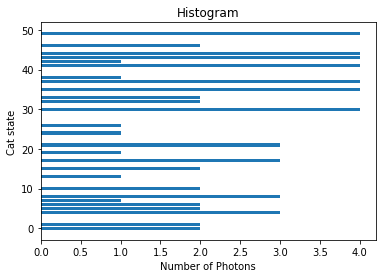

In [ ]:
from matplotlib import pyplot as plt

# Create horizontal bars
plt.barh(np.arange(50), cat)

#plt.bar(range(50), cat)
plt.ylabel('Cat state')
plt.xlabel('Number of Photons')
plt.title('Histogram')
plt.show()

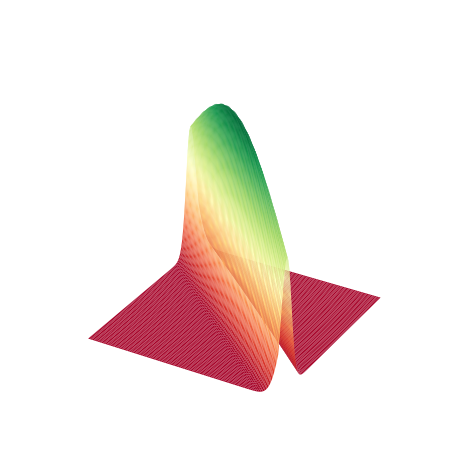

In [ ]:
#...PLOT...CAT...STTE...#

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Simulation
State = eng.run(program).state

fig = plt.figure()
X = np.linspace(-10, 10, 100)
P = np.linspace(-10, 10, 100)
Z = State.wigner(1,X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)

fig.set_size_inches(8, 8)
ax.set_axis_off()

#The simulation result is not like cat state wigner function :)
#challenge: when I take shots from the first mode, then I can not plot the second mode 

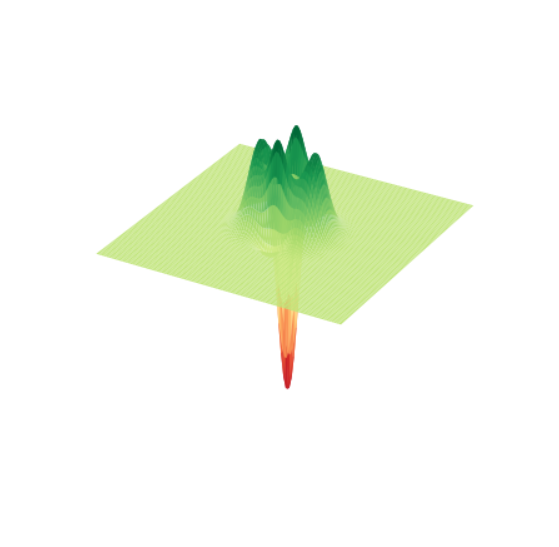